In [237]:
import pandas as pd
import numpy as np
import os

#### Merging 12 months of sales data into a single file

Below is how you read a single csv file into the notebook using Pandas:

In [238]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


But what if you wanted to save time and read all csv files into the notebook? Do you have to have 12 lines of pd.read_csv?

There is almost always an easier, more succinct way to perform a task. Don't be afraid to Google something to find a shorter, better way.

In [239]:
files =  [file for file in os.listdir('./Sales_Data')]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


Now that we have all our files, we need to determine how to merge (or concatenate) them into a single .csv file

In [240]:
# define an empty df to store our data:
all_months_data = pd.DataFrame()

files =  [file for file in os.listdir('./Sales_Data')]
for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.shape

(186850, 6)

In [241]:
all_months_data.to_csv('all_data.csv', index = False)

#### Read in updated dataFrame

In [242]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


##### **QUESTION 1: What was the best month for sales? How much was earned in that month?**

**Answer:** The best month for sales is December. This is likely due to the occurrence of Christmas during the month of December -- the largest shopping holiday in the United States, annually. 

In [243]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

To find the total money earned for each month, we must calculate the total income received for each sale, then add it up for each month.

We can do this as follows:
- earned = price each * quantity of item [Done]
- sum of earned for each month
- max(sum_earned) = best month

Problems encountered:
- There exist some values that are NaN
- There exist columns that are just the column names reiterated for the sake of readability. This causes some calculations to be unable to be performed, resulting in errors.
- The digits shown in the columns are actually strings, not floats or ints

In [244]:
df = pd.DataFrame([all_data['Quantity Ordered'], all_data['Price Each'], 
                   all_data['Order Date']])
df = np.transpose(df)

In [245]:
df.head()

,Quantity Ordered,Price Each,Order Date
0,2,11.95,04/19/19 08:46
1,NaN,NaN,NaN
2,1,99.99,04/07/19 22:30
3,1,600,04/12/19 14:38
4,1,11.99,04/12/19 14:38


Next, we must drop the rows that only contain the column heading repeated for readability:

In [246]:
# previously did it as follows:
''' for i in range(len(df['Quantity Ordered'])):
       if df['Quantity Ordered'][i] == 'Quantity Ordered':
          df.drop(i, inplace=True) '''

# the following does the same, but is much faster and shorter
df = df[df['Quantity Ordered'].str[:2] != 'Qu']

The above removes all entries in the DataFrame that are just the names of the column headers. This is to allow for the necessary multiplication for each month to be had.

In [247]:
df.head()

,Quantity Ordered,Price Each,Order Date
0,2,11.95,04/19/19 08:46
1,NaN,NaN,NaN
2,1,99.99,04/07/19 22:30
3,1,600,04/12/19 14:38
4,1,11.99,04/12/19 14:38


Since the rows that show up as NaN are just blank rows across all columns for the data set, we can drop them entirely:

In [248]:
df.dropna(inplace=True)

Now that 'Quantity Ordered' contains just digits, we must change them from Str to Floats so that we can perform arithmetic:

In [249]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

In [250]:
df.head()

,Quantity Ordered,Price Each,Order Date
0,2,11.95,04/19/19 08:46
2,1,99.99,04/07/19 22:30
3,1,600,04/12/19 14:38
4,1,11.99,04/12/19 14:38
5,1,11.99,04/30/19 09:27


In [251]:
df['Price Each'] = pd.to_numeric(df['Price Each'])

We must now do the same for the 'Price Each' Series. However, since we used .drop(inplace=True) previously, we don't have to repeat the step where we delete the column headings for this Series.

In [252]:
df['Earned'] = df['Quantity Ordered'] * df['Price Each']

In [253]:
df.head()

,Quantity Ordered,Price Each,Order Date,Earned
0,2,11.95,04/19/19 08:46,23.90
2,1,99.99,04/07/19 22:30,99.99
3,1,600.00,04/12/19 14:38,600.00
4,1,11.99,04/12/19 14:38,11.99
5,1,11.99,04/30/19 09:27,11.99


In order to more easily navigate the dataFrame, it is important to reset the indexes of the dataFrame so that it doesn't skip values (0, 1, 2... instead of 0, 2, 3...)

In [254]:
df = df.reset_index(drop=True)

Now that we have the total amount earned for each sale, we must determine how much was earned per month. To do this, we must first identify the month that each purchase occured in, then we must sum all values in the 'Earned' column during that time.

Using a comprehension within a series, we're able to cut just the month portion of the order date off to add it to the new Month column.

In [255]:
# df['Month'] = pd.Series([df['Order Date'][i][:2] for i in range(len(df['Order Date']))])

df['Month'] = pd.to_numeric(df['Order Date'].str[:2])

In [256]:
df['Month'].unique() #ensure it's only the months and that all months are represented

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10], dtype=int64)

In [257]:
# [sum(df['Earned'][i]) for i in df['Month'] if i == '04']

sales_per_month = df.groupby('Month').sum()

Now that we have our total sales per month (in USD earned), we can now graph the outcome to better view the data and answer the question

In [258]:
import matplotlib.pyplot as plt

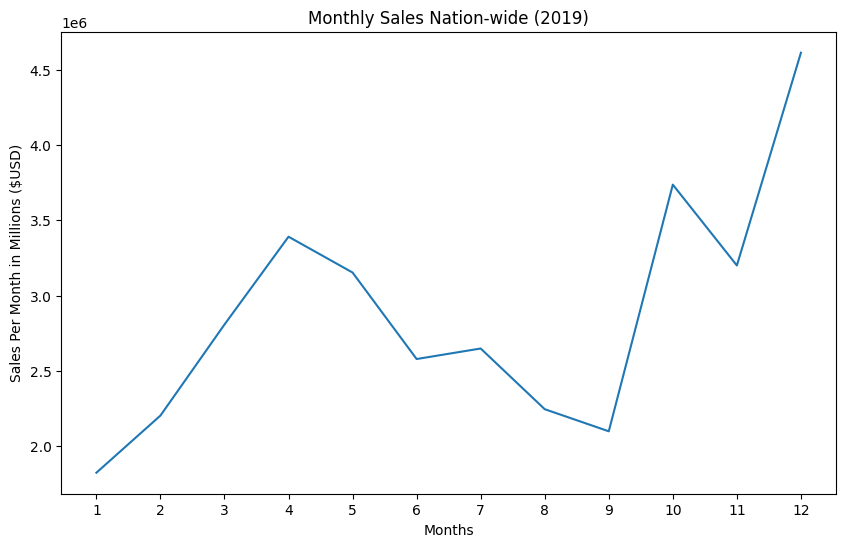

In [259]:
months = np.arange(1, 13)

plt.figure(figsize = (10, 6))

plt.plot(months, sales_per_month['Earned'])
plt.xticks(months)

plt.xlabel('Months')
plt.ylabel('Sales Per Month in Millions ($USD)')
plt.title('Monthly Sales Nation-wide (2019)')

plt.show()

##### **QUESTION 2: What city sold the most products?**

**Answer:** The city that sold the most products (and earned the most in sales) is San Fransisco. This could be due to the overall population, the high frequency of technical work that may require more expensive products such as laptops, the average income within Silicon Valley that allows for more spending, etc. Similarly, the graph shows that the cities that sold the most products earned the most income, and vice versa. This shows that there aren't cities that are buying any more expensive products, but fewer products total, than any other city -- within this dataset.

In order to find the city that sold the most, we must split the data into the cities (and states), then sum up the sales that occurred in that city, similarly to how we did for the months.

In [260]:
df.head()

,Quantity Ordered,Price Each,Order Date,Earned,Month
0,2,11.95,04/19/19 08:46,23.90,4
1,1,99.99,04/07/19 22:30,99.99,4
2,1,600.00,04/12/19 14:38,600.00,4
3,1,11.99,04/12/19 14:38,11.99,4
4,1,11.99,04/30/19 09:27,11.99,4


In [261]:
df.shape

(185950, 5)

In [335]:
temp = pd.Series(all_data['Purchase Address'][all_data['Purchase Address'].str[:1] != 'P'])
temp.dropna(inplace=True)
df['City'] = temp

In [336]:
## This caused so many issues. Be sure to include 'drop = True', or else it won't work. It kept forcing NaN values back in.

df['City'] = temp.reset_index(drop=True)

In [337]:
df.head()

,Quantity Ordered,Price Each,Order Date,Earned,Month,City
0,2,11.95,04/19/19 08:46,23.90,4,"917 1st St, Dallas, TX 75001"
1,1,99.99,04/07/19 22:30,99.99,4,"682 Chestnut St, Boston, MA 02215"
2,1,600.00,04/12/19 14:38,600.00,4,"669 Spruce St, Los Angeles, CA 90001"
3,1,11.99,04/12/19 14:38,11.99,4,"669 Spruce St, Los Angeles, CA 90001"
4,1,11.99,04/30/19 09:27,11.99,4,"333 8th St, Los Angeles, CA 90001"


###### Using the **.apply( )** method to identify cities and states

In [338]:
def get_city_state(address):
    city = address.split(',')[1]
    state = address.split(',')[2].split(' ')[1]
    return f'{city} ({state})'

In [339]:
x = '669 Spruce St, Los Angeles, CA 90001'

get_city_state(x)

' Los Angeles (CA)'

In [342]:
df['City'] = df['City'].apply(lambda x: get_city_state(x))

In [343]:
df.head()

,Quantity Ordered,Price Each,Order Date,Earned,Month,City
0,2,11.95,04/19/19 08:46,23.90,4,Dallas (TX)
1,1,99.99,04/07/19 22:30,99.99,4,Boston (MA)
2,1,600.00,04/12/19 14:38,600.00,4,Los Angeles (CA)
3,1,11.99,04/12/19 14:38,11.99,4,Los Angeles (CA)
4,1,11.99,04/30/19 09:27,11.99,4,Los Angeles (CA)


In [376]:
results = df.groupby('City').sum()

From this, we can see that San Fransisco bought the most products, as well as earned the most in sales.

To plot this, we need to have a list of just the unique values of the cities available. However, just using the .unique() method would cause the cities to change order form the list above. In order to remedy this, we can use the following:

In [351]:
cities = [city for city, result in df.groupby('City')] # a list comprehension for the elements in the .groupby()

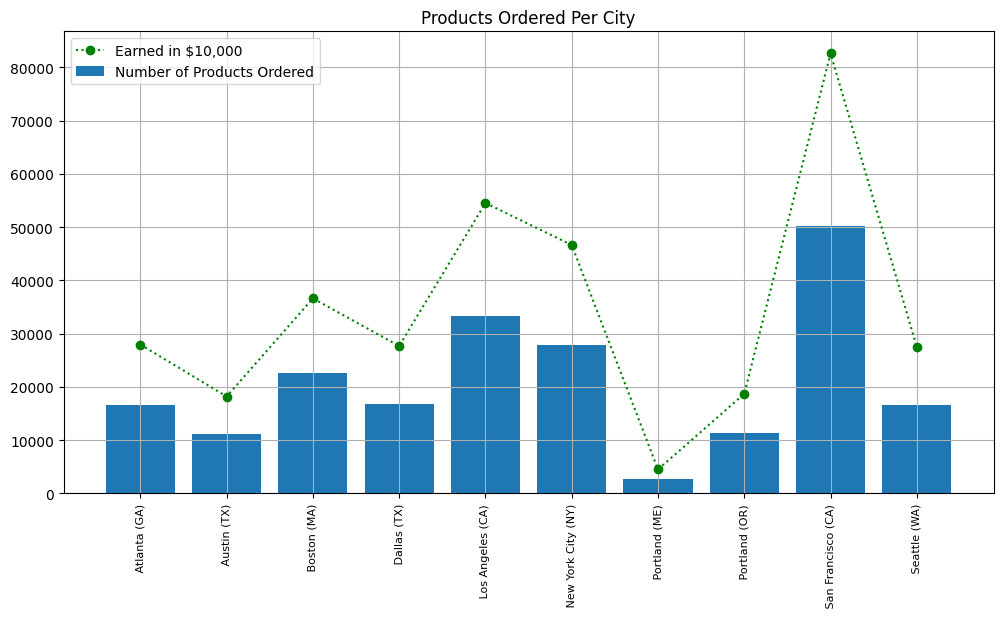

In [394]:
# fig, ax = plt.subplots(figsize=(12, 6))

plt.subplots(figsize = (12, 6))

plt.bar(cities, results['Quantity Ordered'], label='Number of Products Ordered')
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel=('Cities')
plt.ylabel=('Products Ordered')
plt.title('Products Ordered Per City')

plt.plot(cities, results['Earned']/100, ':og', label='Earned in $10,000')
plt.legend()
plt.grid()
plt.show()